In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit
y = data.target
X = data.data
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [4]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
clf.score(X_test, y_test)

0.956140350877193

In [6]:
y_test


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [8]:
np.count_nonzero(y_test==0), np.count_nonzero(y_test==1)

(47, 67)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
conf_mat = np.zeros([2,2])

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] +=1

In [11]:
print(conf_mat)

[[46.  1.]
 [ 4. 63.]]


In [14]:
import pandas as pd
df = pd.DataFrame(conf_mat, columns=["pred 0", "pred 1"], index=["true 0", "true 1"])

In [15]:
print(df)

        pred 0  pred 1
true 0    46.0     1.0
true 1     4.0    63.0


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [18]:
TP = cmat[0,0]
TP

46

In [20]:
TN = cmat[1,1]
TN

63

In [22]:
FP = cmat[1,0]
FP

4

In [23]:
FN = cmat[0,1]
FN

1

# 多クラス問題

In [24]:
from sklearn.datasets import load_digits

data = load_digits()

X = data.data
y = data.target

In [25]:
img = data.images

In [26]:
X[0].shape, img[0].shape

((64,), (8, 8))

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 7.5, 7.5, -0.5)

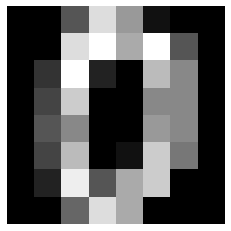

In [28]:
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off')

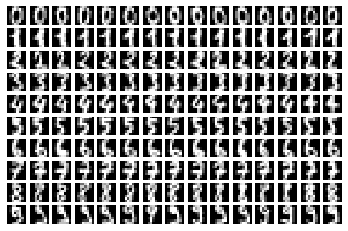

In [30]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(0,15):
        plt.subplot(10, 15, i*15+j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [31]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)

train_index, test_index = next(ss.split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [32]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
clf.score(X_test, y_test)

0.95

In [36]:
y_pred = clf.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.95

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(conf_mat, columns=range(0,10), index=range(0,10))

print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   3   0
2   0   0  34   2   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  30   0   0   0   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   1   0   0   1   0   0  37   0   0
8   0   2   1   0   0   0   0   0  35   1
9   0   0   0   1   0   1   0   0   2  37


In [39]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


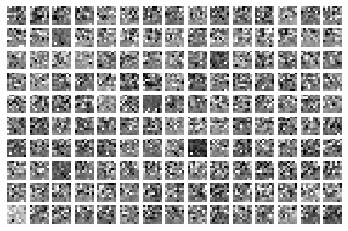

In [42]:
for i in range(10):
    i_th_digit = X_train_pca[y_train==i]
    for j in range(0,15):
        plt.subplot(10, 15, i*15+j+1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='none')

In [43]:
clf.fit(X_train_pca, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
clf.score(X_test_pca, y_test)

0.9583333333333334

In [47]:
y_pred_pca = clf.predict(X_test_pca)

conf_mat = confusion_matrix(y_test, y_pred_pca)

df = pd.DataFrame(conf_mat, columns=range(0,10), index=range(0,10))

print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  32   0   0   0   0   1   0   2   0
2   0   0  35   1   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   0   0   0   0   0  44   0   0   0
7   0   0   0   0   0   0   0  39   0   0
8   0   3   1   0   0   0   0   0  35   0
9   0   0   0   0   0   1   0   2   1  37


In [48]:
X_train_zca = X_train_pca.dot(pca.components_)
X_test_zca = X_test_pca.dot(pca.components_)

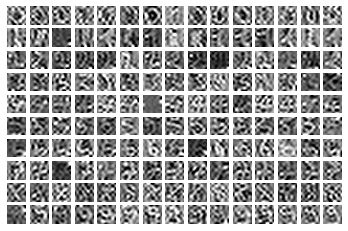

In [49]:
for i in range(10):
    i_th_digit = X_train_zca[y_train ==i]
    for j in range(0,15):
        plt.subplot(10, 15, i* 15 + j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j].reshape(8,8), interpolation='sinc')

In [50]:
clf.fit(X_train_zca, y_train)
clf.score(X_test_zca, y_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9583333333333334